<a href="https://colab.research.google.com/github/nicholasfurl/Great-Courses/blob/main/Lesson09_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#In this notebook we will create a classifier to predict diabetes using a support vector machine (SVM) 
#varying the number of degrees of the polynomial of the SVM.

In [ ]:
#Again, keeping this here for reference but will try to keep actual imports near 
#their function calls to learn their associations whenever possible

import random
from sklearn import svm
import matplotlib.pyplot as plt

In [1]:
#Download the diabetes data from GitHub. 
#We used this with the first decision tree lesson, I believe.

!wget https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

--2023-01-06 10:34:05--  https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0.001s  

2023-01-06 10:34:05 (19.4 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [5]:
#

with open("diabetes.csv", "r") as f:
    data = f.readlines()

#format the data headers
feats = data[0] #col headers 'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\n'
feats = feats.replace('\n','')  #remove newline at end 'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome'
feats = feats.split(",")  #divide by columns into list with separate items 'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome'
feats = feats[0:(len(feats)-1)]	 #Drops off the last column, outcome, because that's the labels and we want a features-only vector.

#Now that you've done the headers, format the datalines themselves in a similar way

alldat = []				
alllabs = []

for i in range(1,len(data)):

  line = data[i]  #line is actually a string, not numbers
  line = line.replace('\n','')		#seems like we already did this above? (no we did it to labels, these are data)
  csvline = line.split(",")		  #split takes a big string and splits it into smaller ones (based on commas presumably)

  #print(line)
  alllabs = alllabs + [int(csvline[len(csvline)-1])]    #I guess the last column of data "Outcome" must be the labels we want.
  #print(labs)
  csvline = [float(csvline[i]) for i in range(len(csvline)-1)]    #seems to take the csvline (split into strings, then converts every string in the row one by one to float)
  #print(csvline)
  alldat = alldat + [csvline]

In [8]:
#We next will create a trainmask and use it to create the train, test data.

import random

#List of randonly sorted 0's, 1's and 2's with length equal to that of alldat (i.e., 768 items)
trainmask = [random.randint(0,2) for i in range(len(alldat))]
print(trainmask)

traindat = [alldat[i] for i in range(len(alldat)) if trainmask[i]]  #So assigns rows of alldat to train dat if trainmask==1?
trainlabs = [alllabs[i] for i in range(len(alldat)) if trainmask[i]]  #same for labels
testdat = [alldat[i] for i in range(len(alldat)) if not trainmask[i]] #So assigns rows of alldat to train dat if trainmask!=1?
testlabs = [alllabs[i] for i in range(len(alldat)) if not trainmask[i]] #same for labels

print(traindat)
print(trainlabs)
print(testdat)
print(testlabs)

[0, 2, 1, 2, 0, 1, 0, 2, 2, 1, 2, 1, 0, 2, 0, 1, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 0, 1, 1, 2, 0, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 2, 1, 1, 0, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 1, 0, 1, 0, 0, 0, 1, 2, 2, 1, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 1, 2, 

In [17]:
#We now will fit 8 different classifier models using a support vector machine, 
#varying the degree of the polynomial from 0 to 7. 
#We then will calculate the training and test error of each model.

from sklearn import svm

#initialise lists to hold errors
trainerr = []
testerr = []
traincorrect = []
testcorrect = []

#polynomial degrees to loop through
degrees = [0,1,2,3,4,5,6,7]

for degree in degrees:

  #So easy!
  clf = svm.SVC(gamma='scale',kernel='poly', degree=degree)
  clf.fit(traindat, trainlabs)  

  #training data accuracy
  pred = clf.predict(traindat)
  trainerr += [sum([pred[i] != trainlabs[i] for i in range(len(trainlabs))]) / len(trainlabs)]
  traincorrect += [sum([pred[i] == trainlabs[i] for i in range(len(trainlabs))]) / len(trainlabs)]

  #test data accuracy
  pred = clf.predict(testdat)
  testerr += [sum([pred[i] != testlabs[i] for i in range(len(testlabs))]) / len(testlabs)]
  testcorrect += [sum([pred[i] == testlabs[i] for i in range(len(testlabs))]) / len(testlabs)]


Text(0.5, 1.0, 'Prediction error by polynomial kernel degree')

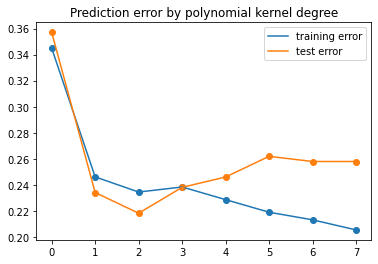

In [15]:
import matplotlib.pyplot as plt

#So we need scatter to create markers and plot doesn't do them?

plt.scatter(degrees, trainerr)
plt.plot(degrees, trainerr, label='training error')
plt.scatter(degrees, testerr)
plt.plot(degrees, testerr, label='test error')
plt.legend()
plt.title('Prediction error by polynomial kernel degree')
#plt.show() #This doesn't seem to do anything

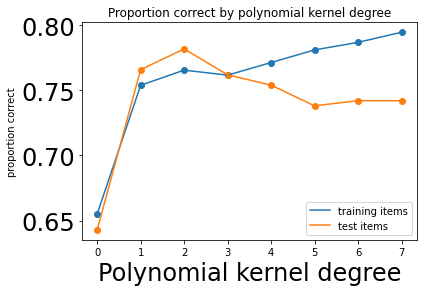

In [24]:
import matplotlib.pyplot as plt

#So we need scatter to create markers and plot doesn't do them?

plt.scatter(degrees, traincorrect)
plt.plot(degrees, traincorrect, label='training items')
plt.scatter(degrees, testcorrect)
plt.plot(degrees, testcorrect, label='test items')
plt.legend()
plt.title('Proportion correct by polynomial kernel degree')
#plt.show()

#Me learning and playing around
plt.xlabel('Polynomial kernel degree', fontsize = 24)
plt.ylabel('proportion correct')
plt.tick_params(axis='y', which='major', labelsize=24)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]


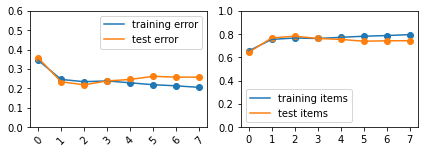

In [48]:
#subplots?

fig = plt.figure()

#ax1 = fig.add_subplot(211)
#ax2 = fig.add_subplot(212)

#Title doesn't seem to work with subplot axes and adding it to the overall figure creates big axes for the whole figure that underlay the subplots and presumably would need to be rendered invisible or white
#plt.title('Overfitting in a SVM with higher polynomial degree') #note title pertains to a figure not an axis


#works too, more transparent and like matlab
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

ax1.scatter(degrees, trainerr)
ax1.plot(degrees, trainerr, label='training error')
ax1.scatter(degrees, testerr)
ax1.plot(degrees, testerr, label='test error')
ax1.legend()

ax2.scatter(degrees, traincorrect)
ax2.plot(degrees, traincorrect, label='training items')
ax2.scatter(degrees, testcorrect)
ax2.plot(degrees, testcorrect, label='test items')
ax2.legend()
#ax2.title('Proportion correct by polynomial kernel degree')
#plt.show()

#Me learning and playing around:

#range only works for ints - so annoying!
#yrange = range(0,1,.2)
yrange = [x / 10.0 for x in range(0, 7, 1)]
print(yrange)

ax1.set_xticks(degrees)
ax1.tick_params(axis ='x', rotation = 45)
ax1.set_yticks(yrange) 

ax2.set_xticks(degrees)
ax2.set_yticks([x / 10.0 for x in range(0, 11, 2)]) 



#
#ax2.set_yticks(degrees)

#These only work on a figure, not a subplot
#ax2.xlabel('Polynomial kernel degree', fontsize = 24)
#ax2.ylabel('proportion correct')
